## 선형회귀(Linear Regression) - 심화

    선형회귀는 쉽게 접근하면 쉽고 어렵게 접근하면 매우 어려운 기술이다.
    전제로 2가지가 정의되어 있어야 하는데
    1) 기본적인 가설 - Hypothesis Function
    2) Cost Function
        Cost는 비용으로 적게 드는 것이 좋은것
        Cost가 안드는 것이 가장 Best
        머신러닝 , 딥러닝에서는 학습을 진행하면서 모델(머신)이 멈춰야 할 시점을
        알아야 한다.
        바로 Cost가 0이 되는 시점이 Running을 멈춰야 하는 시점이다.
        
        기본적으로 예측값과 실제값 사이의 오차가 적을수록 0에 수렴된다.
     3) HyperParameter - learning_rate
        Cost를 줄여나가는 학습을 하면서 주의할 부분은
        학습이 진행됨에 따라서 학습의 속도를 줄이는 것이다.
        경사를 내려가는 보폭을 줄이는 것과 같은 원리로 Cost가 0이 되는 지점을
        통과하지 않기 위해서는 필수적으로 지정해야 하는 속성이다.
        

#### Linear Regression을 활용하여 섭씨온도(C, Celsius)를 화씨온도(F, Fahrenheit)로 변환해주는 공식을 만들수 있다. 
섭씨온도과 화씨온도의 관계는 앞에서 우리가 살펴보았던 선형회귀의 관계를 가지고 있다.
#### <span style="color:red"> H(x) = aX + b 에서처럼, F = C*1.8 +32  </span>
이때, 1.8과 32라는 값을 모르고 있다고 가정하고, 머신러닝 알고리즘을 이용해서 주어진 섭씨 온도와 화씨온도 데이타 만으로 이 값들을 찾아내는 실습을 진행해보도록 하겠다.
<u><span style="color:red">[Chain Rule 증명](https://www.khanacademy.org/math/ap-calculus-ab/ab-differentiation-2-new/ab-3-1b/a/proving-the-chain-rule) </span></u>

### Configuration (or prerequisite)

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Generate Dataset

####  <span style="color:blue">선형회귀 문제를 다루기 위한 학습용 데이타셋을 생성</span>
0도에서 100도 사이의 값을 갖는 섭씨온도 데이타를 100개 만들어보자
이 데이타가 해당 머신러닝 알고리즘에서 사실상 Feature가 될 것이다.

In [2]:
#C = np.random.randint(0,100)
#C = np.random.randint(0,100, size=100)
C = np.random.randint(0,100, size=100)
C

array([31, 32, 76, 30, 99, 52,  3, 96, 93, 82, 98, 16, 26, 48,  2, 21, 62,
       92, 10, 95, 30, 54, 96, 82, 75, 70, 74, 25, 71, 24,  0, 87, 74, 96,
       66, 33, 50, 18, 17, 44, 63, 53, 25, 74, 99, 79, 91, 10, 50, 62, 97,
       17, 79, 92, 45, 45, 33, 16, 87, 11, 59, 27, 24, 71,  1, 38, 93, 74,
       72, 64, 65, 10, 28, 97, 22, 92, 17, 10, 82, 52, 70, 28,  2, 99, 65,
       42, 87, 28,  1, 18, 43, 44, 96,  7, 47,  3, 40, 58, 61, 82])

In [3]:
'''
섭씨온도 데이터를 담고있는 C의 shape를 확인합니다. (100,)로 100개의 데이터가 있습니다.
C의 첫 10개 값을 확인합니다. 
'''

C.shape
C[:10]


array([31, 32, 76, 30, 99, 52,  3, 96, 93, 82])

### 섭씨온도 데이타에 상응하는 화씨온도를 생성
#### <span style="color:blue">우리가 알고있던 기존의 섭씨-화씨변환 공식을 적용해서 위 섭씨온도 데이타에 대응하는 화씨온도 데이타를 생성.</span> 
이 데이타가 오늘 다룰 학습 모델 알고리즘의 Label이 될 것이다.

In [4]:
F = C*1.8+32
F

array([ 87.8,  89.6, 168.8,  86. , 210.2, 125.6,  37.4, 204.8, 199.4,
       179.6, 208.4,  60.8,  78.8, 118.4,  35.6,  69.8, 143.6, 197.6,
        50. , 203. ,  86. , 129.2, 204.8, 179.6, 167. , 158. , 165.2,
        77. , 159.8,  75.2,  32. , 188.6, 165.2, 204.8, 150.8,  91.4,
       122. ,  64.4,  62.6, 111.2, 145.4, 127.4,  77. , 165.2, 210.2,
       174.2, 195.8,  50. , 122. , 143.6, 206.6,  62.6, 174.2, 197.6,
       113. , 113. ,  91.4,  60.8, 188.6,  51.8, 138.2,  80.6,  75.2,
       159.8,  33.8, 100.4, 199.4, 165.2, 161.6, 147.2, 149. ,  50. ,
        82.4, 206.6,  71.6, 197.6,  62.6,  50. , 179.6, 125.6, 158. ,
        82.4,  35.6, 210.2, 149. , 107.6, 188.6,  82.4,  33.8,  64.4,
       109.4, 111.2, 204.8,  44.6, 116.6,  37.4, 104. , 136.4, 141.8,
       179.6])

In [5]:
F[:10]

array([ 87.8,  89.6, 168.8,  86. , 210.2, 125.6,  37.4, 204.8, 199.4,
       179.6])

### Visualization
    위에서 우리가 만든 
    Feature(Celsius Temperature)
    Label(Fahrenheit Temperature)
    직관적으로 확인할수 있도록 matplot을 이용해서 시각화해보자.

Text(0, 0.5, 'Fahrenhei Temperature')

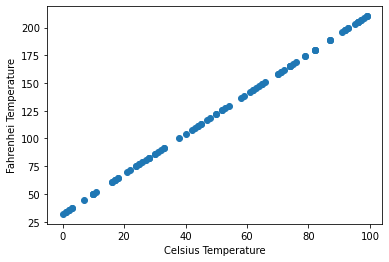

In [6]:
plt.scatter(C,F)
plt.xlabel('Celsius Temperature')
plt.ylabel('Fahrenhei Temperature')

### Bias (편향 찾기) -- Weight는 1.8

####  <span style="color:blue">Weight는 1.8로 주고 Bias를 직관적으로 한번 찾아보겠다.</span>

In [7]:
# 먼저 앞서서 만들어 놓은 속성C, 라벨 F를 각각 X,y에 다시 대입해보자.
X = C 
y = F

In [8]:
w = 1.8 # 이건 알고 있는거 그대로 대입
# b는 랜덤한 값 넣어보자...원래 정답은 32

b= np.random.uniform(low=-1.0, high=1.0) # -1~1 사이의 랜덤한 값을 가져온다.

w,b

(1.8, 0.5124150117846427)

In [9]:
y_predict = w * X + b
y_predict[0:10]

array([ 56.31241501,  58.11241501, 137.31241501,  54.51241501,
       178.71241501,  94.11241501,   5.91241501, 173.31241501,
       167.91241501, 148.11241501])

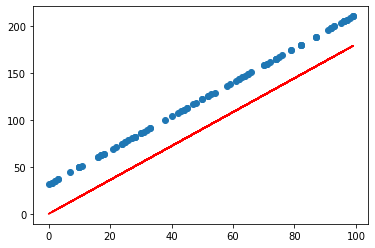

In [10]:
plt.scatter(C,F)
plt.plot(C, y_predict, c='r')

In [11]:
'''
y_predict -y는 오차
이만큼의 오차만큼 bias에 다시 보정(수정)을 해주자
'''

b = b - (y_predict - y).mean()
b

32.00000000000001

### 위에서 다시 보정한 bias값으로 예측값을 다시 만든다

In [12]:
y_predict = w * X + b
y_predict[0:10]

array([ 87.8,  89.6, 168.8,  86. , 210.2, 125.6,  37.4, 204.8, 199.4,
       179.6])

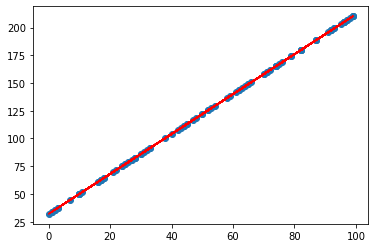

In [13]:
plt.scatter(C,F)
plt.plot(C, y_predict, c='r')

### 가중치(Weight, W), 편향(Bias, B) 찾기

#### 정규분포에 해당하는 w,b값을 랜덤하게 지정해서 초기화
      실제값과 예측치 결과값과의 차이를 시각화해서 확인
      아무리 랜덤한 값으로 학습을 한다고 하더라도 데이터의 특정한 분포가 
      없다면 학습이 이뤄지지 않는다.
      앞에서와 마찬가지로 w, b에 해당하는 값을 랜덤하게 추출할 것이지만
      여전히 uniform() 함수를 이용해서 값을 추출하도록 한다.
  

In [14]:
w = np.random.uniform(low = -1.0, high=1.0)
b = np.random.uniform(low = -1.0, high=1.0)
w, b

(0.006913988670748106, -0.10140289722179352)

In [15]:
y_predict = w * X + b
y_predict[0:10]

array([ 0.11293075,  0.11984474,  0.42406024,  0.10601676,  0.58308198,
        0.25812451, -0.08066093,  0.56234002,  0.54159805,  0.46554417])

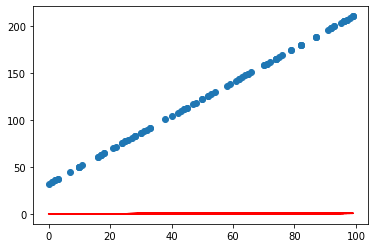

In [16]:
plt.scatter(C,F)
plt.plot(C, y_predict, c='r')

#### <span style="color:blue">선형 회귀의 학습이 끝났으면, 이제 이 머신러닝 알고리즘을 활용하여 변환공식을 완성하고, 주어진 섭씨온도를 화씨온도로 변환(혹은 섭씨온도로 화씨온도를 예측)할 수 있습니다. 앞서 만들어준 데이터를 그대로 활용하여 주어진 섭씨온도(C)로 화씨온도를 예측해보겠습니다.</span>

### Gradient Descent

####  <span style="color:red">이제 경사하강법(Gradient Descent)을 사용하여 섭씨온도를 화씨온도로 변환해줄 주 있는 공식을 찾아보겠다.</span>
공식의 세부내용은 모른다치고, 두 변수(X,y)가 선형(Linear)과 관계있음을 가정(y=X * w + b)하여 가중치(weight)와 편차(bias)를 정의해 둔다. 그리고 경사하강법을 이용해서 선형회귀를 학습시킨다.
학습이 완료되면, 얻어진 최적의 가중치와 편차로 섭씨온도를 화씨온도로 변환해주는 공식을 만들어 줄수 있다.
학습은 모든 epoch이 끝날 때까지 반복할 수도 있지만, 여기선 오차(error)가 0.1 이하가 되면 학습을 종료하도록 한다.

In [17]:
num_epoch = 100000 #학습을 몇번 반복할지의 횟수를 지정, for문을 몇번 돌건지와 연결
learning_rate = 0.0003 # 학습이 진행됨에 따라서 보폭을 결정하는 하이퍼파라미터

#정규분포 안에 랜덤한 값으로 w,b를 얻어온다.
w = np.random.uniform(low = -1.0, high=1.0) # 가중치
b = np.random.uniform(low = -1.0, high=1.0) # 편차

for epoch in range(num_epoch):
    y_predict = w * X + b #일단 먼저 예측한 가설이 나온다.
    
    error = np.abs(y_predict - y).mean() # 현재 오차를 구한다. 오차를 MSE() 사용해도 무방
    
    # error(loss, cost)가 0에 가까워지면 학습을 멈추도록 한다.
    if error <0.1:
        break 
        
    # if 조건이 만족될때까지 w,b 값을 보정해 나가야 한다.
    w = w - learning_rate * ((y_predict - y)*X).mean()
    b = b - learning_rate * (y_predict - y).mean()
    
    if epoch % 10000 == 0 :
        print(f'{epoch}, w = {w:.6f}, b = {b:.6f}, error = {error:.6f}')
        
# 최종 결과를 출력
print('-----------'*10)
print(f'{epoch:5}, w = {w:.6f}, b = {b:.6f}, error = {error:.6f}')



0, w = 2.453056, b = -0.500641, error = 111.894065
10000, w = 2.011864, b = 17.114582, error = 6.290269
20000, w = 1.897027, b = 25.182990, error = 2.880727
30000, w = 1.844435, b = 28.878044, error = 1.319274
40000, w = 1.820350, b = 30.570251, error = 0.604182
50000, w = 1.809319, b = 31.345224, error = 0.276695
60000, w = 1.804268, b = 31.700135, error = 0.126717
--------------------------------------------------------------------------------------------------------------
63032, w = 1.803368, b = 31.763340, error = 0.100000


### Predict

In [18]:
# 위에서 Cost 0.099일 때 받은 W,B값으로 가설을 다시 세워보자
Y_predict = w * C + b
y_predict[:5]

array([ 87.66776021,  89.47112859, 168.81933725,  85.86439183,
       210.29680996])

## DataFrame and Plot Visualization

In [19]:
# 처음에 나왔던 섭씨, 화씨온도와 표로 예측한 온도를 비교해 보자.
result = pd.DataFrame({"C":C, "F":F, "F(Predict)":y_predict})
result.head(10)

,C,F,F(Predict)
0,31,87.8,87.667760
1,32,89.6,89.471129
2,76,168.8,168.819337
3,30,86.0,85.864392
4,99,210.2,210.296810
5,52,125.6,125.538496
6,3,37.4,37.173446
7,96,204.8,204.886705
8,93,199.4,199.476600
9,82,179.6,179.639548


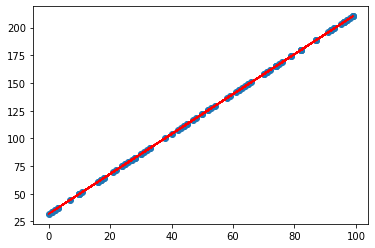

In [20]:
plt.scatter(C,F)
plt.plot(C, y_predict, c='r')